In [6]:
#!/usr/bin/env python3


##imported libraries##
import requests
import csv
import json
import datetime
import os

##changes CWD if ran from task scheduler or cron##
os.chdir(r'C:\Users\tvu21\OneDrive\Desktop\Python\mycode\Project_Code')



##declared variables##
city = "seattle"
api_key = "ab4f8a1a1bce3082d408c58e4a6586ca"
csvheader = ['TEMP','CONDITION','CURRENT TIME']




##DATASET INDEX VARIABLES##

TEMPERATURE = 0
CONDITION = 1
SUNSET_TIME = 3



## Sends a get request to the api and returns a json
def get_json(city, api_key):
    url = f"https://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}&units=imperial"  ##PARAMS == CITY, API_KEY, UNITS
    response = requests.get(url).json()    ## returns a dict
    weatherdata = json.dumps(response, indent=4) ## returns data in readable format str
    return response


## returns the data from api json file and returns a list of values
def get_data(response):

    ##pulls any data from response.json that is specified
    temp = response['main']['temp']
    condition = response['weather'][0]["main"]



    ##time test calculations for later
    sunset = int(response["sys"]["sunset"])
    sunset_time  =  datetime.datetime.fromtimestamp(sunset)
    now = datetime.datetime.now()
    difference = sunset_time - now

    return [temp,condition,now]


    ##print("test works" , temp , condition ,test)
    print(difference.total_seconds() /60**2 )





def temp_check(data, output_file):
    if data[TEMPERATURE] < 32.00:
        output_file.write(f"It is a freezing {data[TEMPERATURE]} degrees out there!\n")
    if data[TEMPERATURE] > 100.00:
        output_file.write(f"Holy shit its {data[TEMPERATURE]} degrees outside!! Remember to hydrate!\n")
    else:
        output_file.write(f"Not too hot not too cold right now\n")



def rain_check(data, output_file):
    if data[CONDITION] == 'Rain':
        output_file.write("Its raining bring a coat!\n")
    else:
        output_file.write("Looks pretty clear out there!\n")
    
def main():


    response = get_json(city, api_key)
    data = get_data(response)


    with open('test.csv', 'a', encoding='UTF8', newline='') as f:
        writer = csv.writer(f)
        ##writer.writerow(csvheader)
        writer.writerow(data)
        


    with open ('output_file.txt', 'w', encoding='UTF8', newline='') as output_file:
        temp_check(data,output_file)
        rain_check(data,output_file)

    


if __name__ == '__main__':
    main()





In [35]:
%matplotlib inline

      TEMP CONDITION                CURRENT_TIME
0    49.10      Rain  2022-03-02 18:14:09.242534
1    49.19      Rain  2022-03-02 18:21:02.169820
2    49.15      Rain  2022-03-02 18:22:01.544988
3    49.17      Rain  2022-03-02 18:23:01.922133
4    49.19      Rain  2022-03-02 18:24:02.289108
..     ...       ...                         ...
469  31.75     Clear  2022-03-10 00:34:23.261890
470  31.75     Clear  2022-03-10 00:37:23.068246
471  31.48     Clear  2022-03-10 00:47:23.073525
472  31.35     Clear  2022-03-10 00:55:25.787410
473  31.35     Clear  2022-03-10 00:57:23.063740

[474 rows x 3 columns]


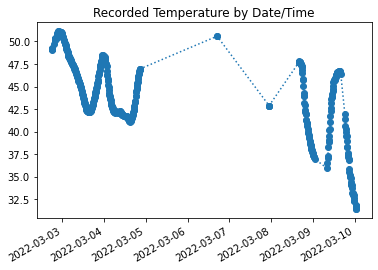

In [10]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
import datetime

weatherdata = pandas.read_csv('test.csv')
print(weatherdata)

TIMES = pandas.to_datetime(weatherdata.CURRENT_TIME)
plt.plot_date(TIMES, weatherdata.TEMP, linestyle='dotted')

plt.gcf().autofmt_xdate()
plt.title('Recorded Temperature by Date/Time')
plt.show()


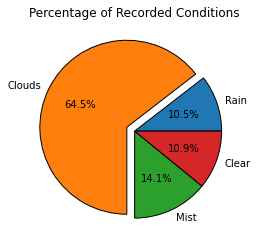

In [13]:
conditions = weatherdata.CONDITION.values.tolist()
slices = [conditions.count('Rain'), conditions.count('Clouds'),conditions.count('Mist'),conditions.count('Clear')]
labels = ['Rain','Clouds', 'Mist','Clear']
explode = [0, .1, 0, 0]
        
#print(slices)
plt.pie(slices, labels=labels, wedgeprops={'edgecolor': 'black'},explode=explode, autopct='%1.1f%%' )
plt.title('Percentage of Recorded Conditions')
plt.show()